Import relevant Python packages.

In [33]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read data.

In [2]:
df = PandasTools.LoadSDF("../data/JCIM_59_1269/HERG.sdf")
df['pIC50'] = [float(x) for x in df.pIC50]

Recast molecular structures.

In [3]:
df['SMILES'] = [Chem.MolToSmiles(x) for x in df.ROMol]
df = df.drop(columns = ['ID', 'ROMol'])
df['Molecule'] = [Chem.MolFromSmiles(x) for x in df.SMILES]

In [4]:
sampling = df.sample(8)
mols = sampling.Molecule
mol_names = sampling.ChEMBL_ID.tolist()

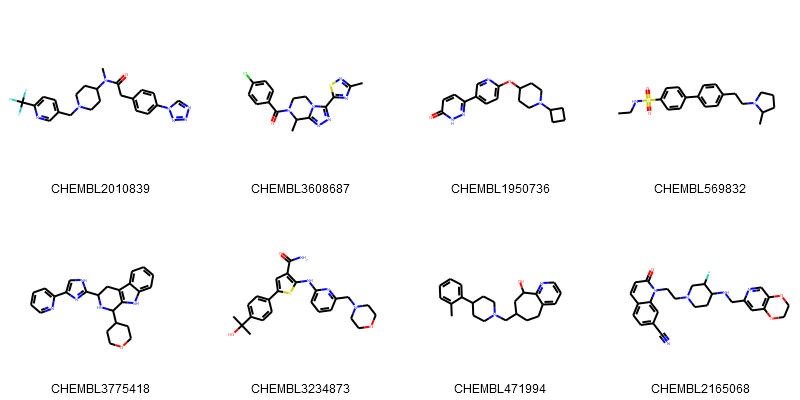

In [5]:
Draw.MolsToGridImage(mols,
                     legends = mol_names,
                     molsPerRow = 4)

Rank order by decreasing pIC50 (most active compound is first in the sorted dataset).

In [6]:
df.sort_values(by = 'pIC50', ascending = False, inplace = True, ignore_index = True)

In [7]:
# df.head(10)

In [8]:
needle = df.iloc[0]

In [9]:
needle

pIC50                                                     9.85
ChEMBL_ID                                        CHEMBL1257821
SMILES             Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)cc1
Molecule     <img data-content="rdkit/molecule" src="data:i...
Name: 0, dtype: object

In [11]:
df['maccs'] = [MACCSkeys.GenMACCSKeys(x) for x in df.Molecule]

In [12]:
df.columns

Index(['pIC50', 'ChEMBL_ID', 'SMILES', 'Molecule', 'maccs'], dtype='object')

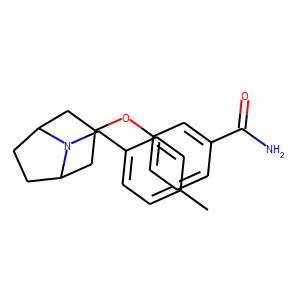

In [13]:
Draw.MolToImage(df.loc[0, 'Molecule'])

<img src="../figures/CHEMBL1257821.png" height="250" width="250">

![](../figures/CHEMBL1257821.png")

In [14]:
df.loc[0, 'maccs']

In [15]:
df.loc[0, 'maccs'].ToBitString()

'00000000000000000001000000000000000000000000000000000000000000000000000000010000000111000000100011101000010000110100011001100111110010000100001101011001111111111111110'

In [16]:
DataStructs.TanimotoSimilarity(df.loc[0, 'maccs'], df.loc[99, 'maccs'])

0.6031746031746031

In [19]:
df['ecfp4'] = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits = 1024) for x in df.Molecule]

In [20]:
df.columns

Index(['pIC50', 'ChEMBL_ID', 'SMILES', 'Molecule', 'maccs', 'ecfp4'], dtype='object')

In [21]:
df.loc[0, 'ecfp4']

In [22]:
df.loc[0, 'ecfp4'].ToBitString()

'000000000000000100000000000000000100000000000000000000000000000010000010000000001000000000000000000000000000000000000001000000000000000000001000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000100000010000000000000000000000000000000010000000110000000000010000000000000001000000000000000001000110000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000010000000000000000000000000000000010000000000000000000000000000000000000000000000000000001000000001000000000000000000000000000000100001001000010000000000000000000000100010000000000100000000000000000000000000000000000000000000000000000000010000000100000000000000000100000000000000000000000100000000000000000000000001000000000010100011001000000000000000000000000000001000000001000000000000000000000000010010000000000000000000000000000000000

In [23]:
DataStructs.TanimotoSimilarity(df.loc[0, 'ecfp4'], df.loc[99, 'ecfp4'])

0.15853658536585366

In [25]:
df['fcfp4'] = [AllChem.GetMorganFingerprintAsBitVect(x, 2, useFeatures = True, nBits = 1024) for x in df.Molecule]

In [26]:
df.columns

Index(['pIC50', 'ChEMBL_ID', 'SMILES', 'Molecule', 'maccs', 'ecfp4', 'fcfp4'], dtype='object')

In [27]:
df.loc[0, 'fcfp4'].ToBitString()

'111010000000000000100000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000100000000000000000100000000000000000000000000000000000000000000000010000000000000000000000000000001000000000000100000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000100010000000000000000100000001000000000000000000000000000000000000000000000000000010000000000000100000000000000000000000000000000000000000000000010010000000000000000000000000000000000000000000000000001000000000000000100000000000000000000000000000010000000000000000100000000000000000000000000000000000000000000000010000000000000000000001000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000100000000000000000000000000100000

In [28]:
DataStructs.TanimotoSimilarity(df.loc[0, 'fcfp4'], df.loc[99, 'fcfp4'])

0.19047619047619047

In [34]:
df['topo'] = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x, nBits = 1024) for x in df.Molecule]

In [35]:
df.columns

Index(['pIC50', 'ChEMBL_ID', 'SMILES', 'Molecule', 'maccs', 'ecfp4', 'fcfp4',
       'topo'],
      dtype='object')

In [36]:
df.loc[0, 'topo'].ToBitString()

'000000000000000000000000000010000000000011000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000011000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000111000000000000000000000000000000000000000000000000000000000000010001110000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000001100000000000000000000000000000000000000000011100000000000000000000000000000000000000000000011001110000000000000000010000000000000001100000011000000100000000000000000000000000000001100000000000000000000000000000000000000000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000000000000000000000000000000000000

In [38]:
DataStructs.TanimotoSimilarity(df.loc[0, 'topo'], df.loc[99, 'topo'])

0.1891891891891892

In [39]:
df['ap'] = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x, nBits = 1024) for x in df.Molecule]

In [40]:
df.columns

Index(['pIC50', 'ChEMBL_ID', 'SMILES', 'Molecule', 'maccs', 'ecfp4', 'fcfp4',
       'topo', 'ap'],
      dtype='object')

In [41]:
df.loc[0, 'ap'].ToBitString()

'111111100000000011000000000011000000000000001000111000001000110000000000000000000000000011100000000010001100100000001000000000000000000000001100000000000000000011000000100000000000000000000000110011101100000011110000100011111111000011000000000000000000110011101111000000000000100000000000110000000000000000001110100011100000000000000000100011001000110010000000100010000000000010000000100000000000000000000000000000000000000010000000111010000000000011100000000011000000111011110000000011110000000010000000000000000000000011001100000011101110100000001110000000000000000011000000000000000000000000000000000010001000000011001110110000000000100000001100000000000000000000000000000011000000000010001000100000001110110010000000111011101110100000000000000000000000000000001000100000001111111011000000000011001000000000000000111011000000111010000000000000000000110000001100100000000000110010000000100011001000000000000000000000000000000011000000000000000000000000001000000011000000000011111110100011101000110

In [42]:
DataStructs.TanimotoSimilarity(df.loc[0, 'ap'], df.loc[99, 'ap'])

0.3649025069637883

In [43]:
def draw_ranked_molecules(sim_df_sorted, sorted_column):
    """
    Function that draws molecules from a (sorted) DataFrame.
    """
    # Define labels: first molecule is query, following molecules start from rank 1
    rank = ["#"+str(i)+": " for i in range(0, len(sim_df_sorted))]
    rank[0] = "Query: "

    # Draw most similar molecules to Doxycycline (Tanimoto and MACCS fingerprint)
    top_smiles = sim_df_sorted["smiles"].tolist()
    top_mols = [Chem.MolFromSmiles(i) for i in top_smiles]
    top_names = [i+j+" ("+str(round(k, 2))+")" for i, j, k in zip(rank, sim_df_sorted["name"].tolist(), 
                                                                  sim_df_sorted[sorted_column])]

    return Draw.MolsToGridImage(top_mols, legends=top_names, molsPerRow=2, subImgSize=(450, 150))

In [45]:
df.columns

Index(['pIC50', 'ChEMBL_ID', 'SMILES', 'Molecule', 'maccs', 'ecfp4', 'fcfp4',
       'topo', 'ap'],
      dtype='object')

In [48]:
sim_df = pd.DataFrame(df, columns=['SMILES', 'pIC50', 'ChEMBL_ID'])

In [49]:
sim_df.head()

,SMILES,pIC50,ChEMBL_ID
0,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)cc1,9.85,CHEMBL1257821
1,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCCc2ccccc2)c1,9.60,CHEMBL1257820
2,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)s1,9.59,CHEMBL1257578
3,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCc2ccccc2)c1,9.42,CHEMBL1257698
4,O=C1COc2ccc(CNC34CCC(CCc5ccnc6cc(C(F)(F)F)cnc5...,9.41,CHEMBL3422978


In [50]:
sim_df['tanimoto_MACCS'] = DataStructs.BulkTanimotoSimilarity(df.loc[0, 'maccs'], df['maccs'])

In [52]:
sim_df.head(10)

,SMILES,pIC50,ChEMBL_ID,tanimoto_MACCS
0,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)cc1,9.85,CHEMBL1257821,1.000000
1,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCCc2ccccc2)c1,9.60,CHEMBL1257820,0.977778
2,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)s1,9.59,CHEMBL1257578,0.900000
3,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCc2ccccc2)c1,9.42,CHEMBL1257698,0.977778
4,O=C1COc2ccc(CNC34CCC(CCc5ccnc6cc(C(F)(F)F)cnc5...,9.41,CHEMBL3422978,0.492958
5,COC1OC2(CCN(Cc3ccccc3)CC2)c2cnn(-c3ccccc3)c21,9.39,CHEMBL410832,0.578125
6,NC(=O)c1cccc(OC2CC3CCC(C2)N3Cc2cccs2)c1,9.37,CHEMBL1257577,0.897959
7,Cc1cccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)c1,9.28,CHEMBL1257937,0.978261
8,NC(=O)c1cccc(OC2CC3CCC(C2)N3Cc2ccc3c(c2)OCO3)c1,9.21,CHEMBL1258280,0.785714
9,Cc1ccccc1CN1C2CCC1CC(Oc1cccc(C(N)=O)c1)C2,9.21,CHEMBL1257938,0.937500


In [53]:
sim_df['dice_MACCS'] = DataStructs.BulkDiceSimilarity(df.loc[0, 'maccs'], df['maccs'])

In [54]:
sim_df.head(10)

,SMILES,pIC50,ChEMBL_ID,tanimoto_MACCS,dice_MACCS
0,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)cc1,9.85,CHEMBL1257821,1.000000,1.000000
1,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCCc2ccccc2)c1,9.60,CHEMBL1257820,0.977778,0.988764
2,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)s1,9.59,CHEMBL1257578,0.900000,0.947368
3,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCc2ccccc2)c1,9.42,CHEMBL1257698,0.977778,0.988764
4,O=C1COc2ccc(CNC34CCC(CCc5ccnc6cc(C(F)(F)F)cnc5...,9.41,CHEMBL3422978,0.492958,0.660377
5,COC1OC2(CCN(Cc3ccccc3)CC2)c2cnn(-c3ccccc3)c21,9.39,CHEMBL410832,0.578125,0.732673
6,NC(=O)c1cccc(OC2CC3CCC(C2)N3Cc2cccs2)c1,9.37,CHEMBL1257577,0.897959,0.946237
7,Cc1cccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)c1,9.28,CHEMBL1257937,0.978261,0.989011
8,NC(=O)c1cccc(OC2CC3CCC(C2)N3Cc2ccc3c(c2)OCO3)c1,9.21,CHEMBL1258280,0.785714,0.880000
9,Cc1ccccc1CN1C2CCC1CC(Oc1cccc(C(N)=O)c1)C2,9.21,CHEMBL1257938,0.937500,0.967742


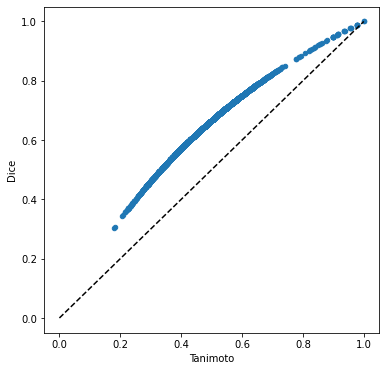

In [55]:
fig, axes = plt.subplots(figsize=(6,6), nrows=1, ncols=1)
sim_df.plot('tanimoto_MACCS','dice_MACCS',kind='scatter',ax=axes)
plt.plot([0,1],[0,1],'k--')
axes.set_xlabel("Tanimoto")
axes.set_ylabel("Dice")
plt.show()

In [56]:
sim_df['tanimoto_ECFP4'] = DataStructs.BulkTanimotoSimilarity(df.loc[0, 'ecfp4'], df['ecfp4'])

In [57]:
sim_df['tanimoto_FCFP4'] = DataStructs.BulkTanimotoSimilarity(df.loc[0, 'fcfp4'], df['fcfp4'])

In [58]:
sim_df['tanimoto_TOPO'] = DataStructs.BulkTanimotoSimilarity(df.loc[0, 'topo'], df['topo'])

In [59]:
sim_df['tanimoto_AP'] = DataStructs.BulkTanimotoSimilarity(df.loc[0, 'ap'], df['ap'])

In [60]:
sim_df.head(10)

,SMILES,pIC50,ChEMBL_ID,tanimoto_MACCS,dice_MACCS,tanimoto_ECFP4,tanimoto_FCFP4,tanimoto_TOPO,tanimoto_AP
0,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)cc1,9.85,CHEMBL1257821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCCc2ccccc2)c1,9.60,CHEMBL1257820,0.977778,0.988764,0.637931,0.675000,0.696429,0.599251
2,Cc1ccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)s1,9.59,CHEMBL1257578,0.900000,0.947368,0.701754,0.731707,0.777778,0.761506
3,NC(=O)c1cccc(OC2CC3CCC(C2)N3CCc2ccccc2)c1,9.42,CHEMBL1257698,0.977778,0.988764,0.690909,0.692308,0.722222,0.677419
4,O=C1COc2ccc(CNC34CCC(CCc5ccnc6cc(C(F)(F)F)cnc5...,9.41,CHEMBL3422978,0.492958,0.660377,0.095238,0.123457,0.095238,0.311688
5,COC1OC2(CCN(Cc3ccccc3)CC2)c2cnn(-c3ccccc3)c21,9.39,CHEMBL410832,0.578125,0.732673,0.158537,0.250000,0.168539,0.433234
6,NC(=O)c1cccc(OC2CC3CCC(C2)N3Cc2cccs2)c1,9.37,CHEMBL1257577,0.897959,0.946237,0.666667,0.690476,0.754717,0.781250
7,Cc1cccc(CN2C3CCC2CC(Oc2cccc(C(N)=O)c2)C3)c1,9.28,CHEMBL1257937,0.978261,0.989011,0.826923,0.970588,0.843137,0.803347
8,NC(=O)c1cccc(OC2CC3CCC(C2)N3Cc2ccc3c(c2)OCO3)c1,9.21,CHEMBL1258280,0.785714,0.880000,0.706897,0.837838,0.677419,0.714829
9,Cc1ccccc1CN1C2CCC1CC(Oc1cccc(C(N)=O)c1)C2,9.21,CHEMBL1257938,0.937500,0.967742,0.727273,0.885714,0.745455,0.781893


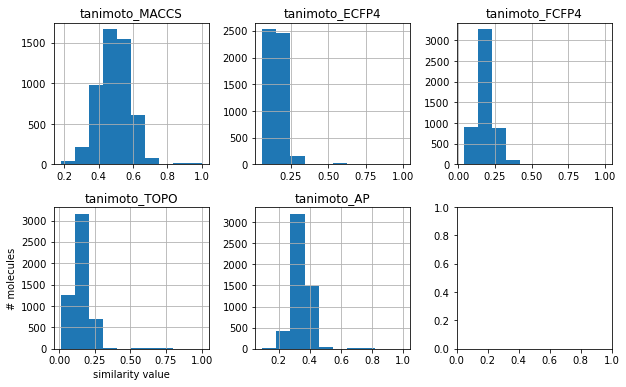

In [67]:
# Plot distribution of Tanimoto similarity of MACCS fingerprints
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,6), nrows=2, ncols=3)
sim_df.hist(["tanimoto_MACCS"], ax=axes[0,0])
sim_df.hist(["tanimoto_ECFP4"], ax=axes[0,1])
sim_df.hist(["tanimoto_FCFP4"], ax=axes[0,2])
sim_df.hist(["tanimoto_TOPO"], ax=axes[1,0])
sim_df.hist(["tanimoto_AP"], ax=axes[1,1])
axes[1,0].set_xlabel("similarity value")
axes[1,0].set_ylabel("# molecules")
plt.show()

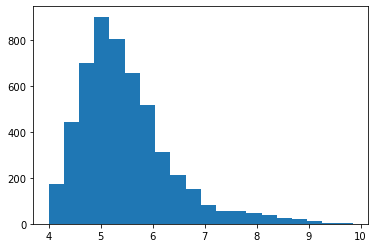

In [74]:
plt.hist(df.pIC50, bins = 20)
plt.show()

In [98]:
threshold = 6.0

In [104]:
len(sim_df)

5207

In [99]:
def get_enrichment_data(similarity_df, similarity_measure, threshold):
    """
    This function calculates x and y values for enrichment plot:
    x - % ranked dataset
    y - % true actives identified
    """
    
    # Get number of molecules in data set
    mols_all = len(similarity_df)
    
    # Get number of active compounds in data set
    actives_all = sum(similarity_df.pIC50 >= threshold)

    # Initialize a list that will hold the counter for actives and compounds while iterating through our dataset
    actives_counter_list = []
    
    # Initialize counter for actives
    actives_counter = 0
    
    # Note: Data must be ranked for enrichment plots:
    # Sort compounds by selected similarity measure
    similarity_df.sort_values([similarity_measure], ascending=False, inplace=True)

    # Iterate over the ranked dataset and check each compound if active (by checking bioactivity)
    for value in similarity_df.pIC50:
        if value >= threshold:
            actives_counter += 1
        actives_counter_list.append(actives_counter)

    # Transform number of molecules into % ranked dataset
    mols_perc_list = [i/mols_all for i in list(range(1, mols_all+1))]

    # Transform number of actives into % true actives identified
    actives_perc_list = [i/actives_all for i in actives_counter_list]

    # Generate DataFrame with x and y values as well as label 
    enrich_df = pd.DataFrame({'% ranked dataset':mols_perc_list, 
                              '% true actives identified':actives_perc_list,
                              'similarity_measure': similarity_measure})
    
    return enrich_df

In [100]:
# Define similarity measures to be plotted
sim_measures = ['tanimoto_MACCS', 'tanimoto_ECFP4', 'tanimoto_FCFP4', 'tanimoto_TOPO', 'tanimoto_AP']

# Generate a list of DataFrames containing all enrichment plot data for all similarity measures
enrich_data = [get_enrichment_data(sim_df, i, threshold) for i in sim_measures]

In [101]:
# Prepare data set for plotting:
# Concatenate per-similarity measure DataFrames to one DataFrame
# - different similarity measures are still distinguishable by the "similarity_measure" column
enrich_df = pd.concat(enrich_data)

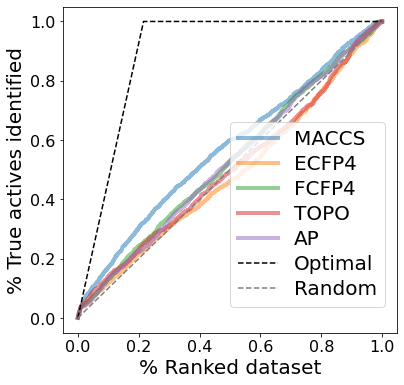

In [103]:
fig, ax = plt.subplots(figsize=(6, 6))

fontsize = 20

for key, grp in enrich_df.groupby(['similarity_measure']):
    ax = grp.plot(ax = ax,
                  x = '% ranked dataset',
                  y = '% true actives identified',
                  label=key,
                  alpha=0.5, linewidth=4)
ax.set_ylabel('% True actives identified', size=fontsize)
ax.set_xlabel('% Ranked dataset', size=fontsize)

# Ratio of actives in dataset
ratio = sum(sim_df.pIC50 >= threshold) / len(sim_df)

# Plot optimal curve
ax.plot([0,ratio,1], [0,1,1], label="Optimal curve", color="black", linestyle="--")

# Plot random curve
ax.plot([0,1], [0,1], label="Random curve", color="grey", linestyle="--")

plt.tick_params(labelsize=16)
plt.legend(labels=['MACCS', 'ECFP4', 'FCFP4', 'TOPO', 'AP', "Optimal", "Random"], loc=(.5, 0.08), 
           fontsize=fontsize, labelspacing=0.3)

# Save plot - use bbox_inches to include text boxes:
# https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
# plt.savefig("../figures/enrichment_plot.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()